# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Laboratorio 2: Series de Tiempo

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169

**Curso:** Data Science  
**Sección:** 10  

---

Guatemala, 1 de agosto de 2024


# CONSUMO-2024-05.xlsx  

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
%matplotlib inline


In [38]:

def combineDieselColumns(csvPath):
    print("📂 Iniciando la combinación de las columnas de Diesel...")

    try:
        # Leer el archivo CSV en un DataFrame
        df = pd.read_csv(csvPath)
        print(f"✅ Archivo cargado: {csvPath}")
    except Exception as e:
        print(f"❌ Error al cargar {csvPath}: {e}")
        return None
    
    if 'Diesel alto azufre' not in df.columns or 'Diesel bajo azufre' not in df.columns:
        print("❌ Las columnas 'Diesel alto azufre' o 'Diesel bajo azufre' no existen en el archivo CSV.")
        return None

    # Crear la nueva columna 'Diesel'
    df['Diesel'] = df['Diesel alto azufre'].replace(0, pd.NA).combine_first(df['Diesel bajo azufre'].replace(0, pd.NA))
    
    # Eliminar las columnas originales si es necesario
    # df.drop(['Diesel alto azufre', 'Diesel bajo azufre'], axis=1, inplace=True)
    
    print("🏁 Combinación de columnas completada.")
    return df

csvPath = 'Consumo/CONSUMO-2024-05.csv'
dataConsumo = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Consumo/CONSUMO-2024-05.csv
🏁 Combinación de columnas completada.


In [39]:
dataConsumo = dataConsumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataConsumo['Fecha'] = pd.to_datetime(dataConsumo['Fecha'])
dataConsumo.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.20,308156.82,634667.06,194410.476190
1,2000-02-01,205530.96,307766.31,642380.66,174710.552381
2,2000-03-01,229499.56,331910.29,699807.25,189234.066667
3,2000-04-01,210680.40,315648.08,586803.98,174330.607143
4,2000-05-01,208164.34,319667.97,656948.2,191745.147619


In [48]:
#plt.figure(figsize=(12, 8))

#for i, column in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo'], 1):
#    plt.subplot(2, 2, i)
#    sns.histplot(dataConsumo[column], kde=True)
#    plt.title(f'Distribución de {column}')
#    plt.xlabel(column)

#plt.tight_layout()
#plt.show()

Shape of your Data Set loaded: (293, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,160741.900000,894533.140000,No issue
Gasolina superior,float64,0.000000,NA,300242.781667,768102.830000,Column has a high correlation with ['Gasolina regular']. Consider dropping one of them.
Diesel,float64,0.000000,NA,507662.650000,1463008.430000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior']. Consider dropping one of them."
Gas licuado de petróleo,float64,0.000000,NA,167818.137897,588892.160000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior', 'Diesel']. Consider dropping one of them."


Number of All Scatter Plots = 10


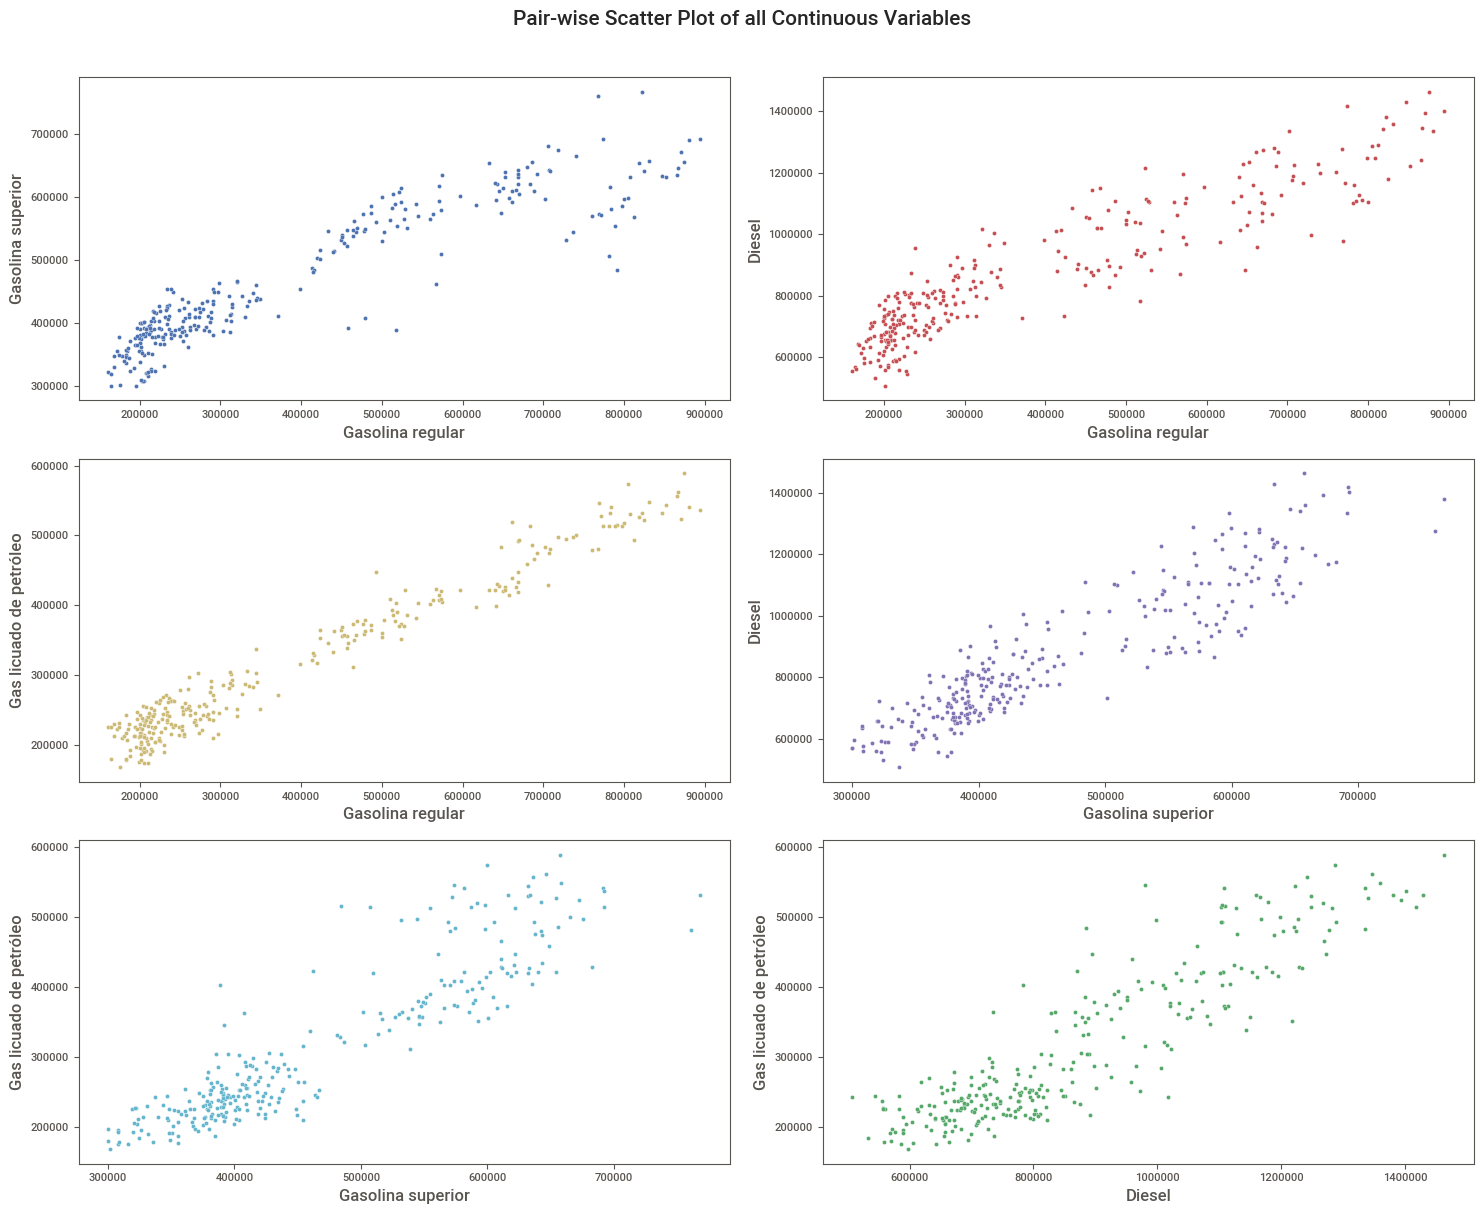

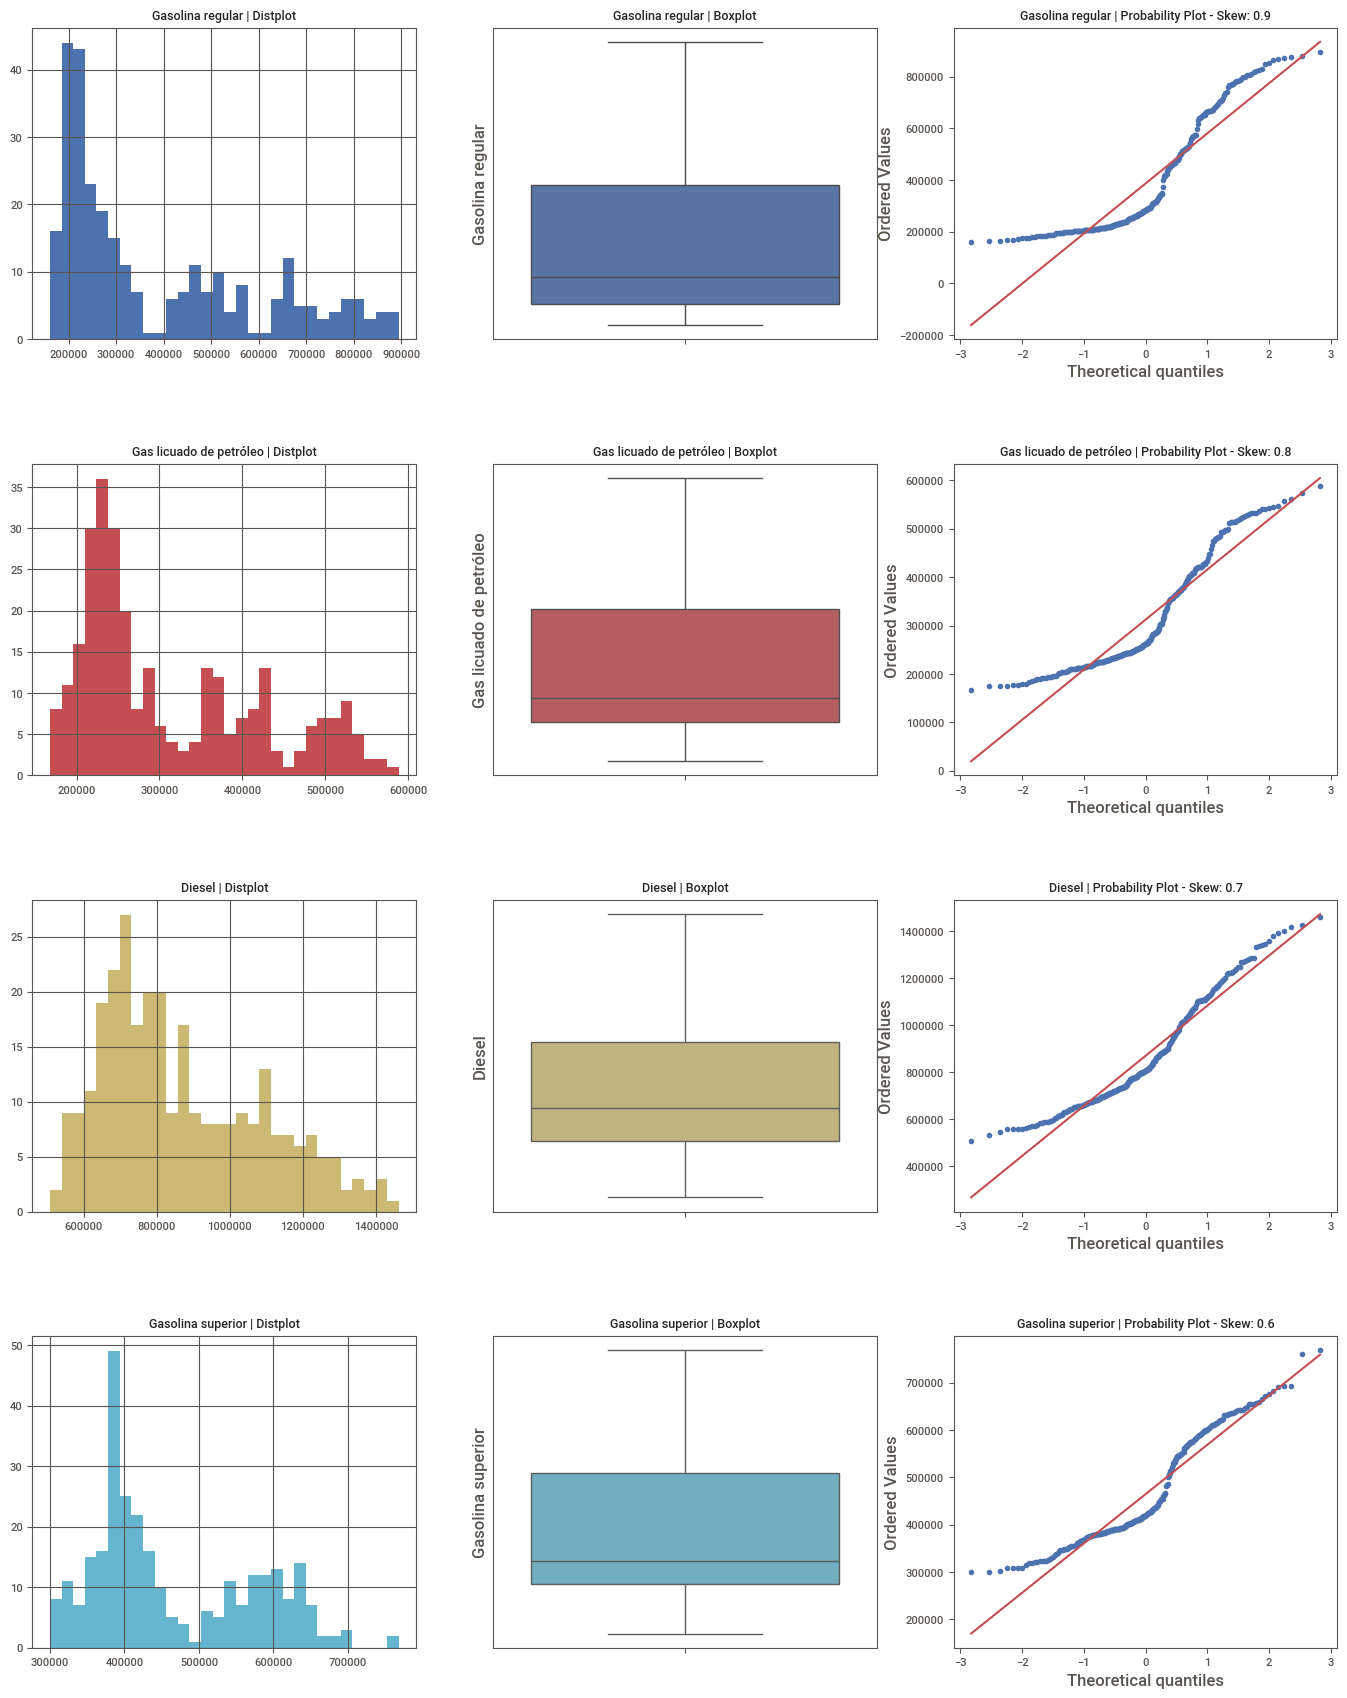

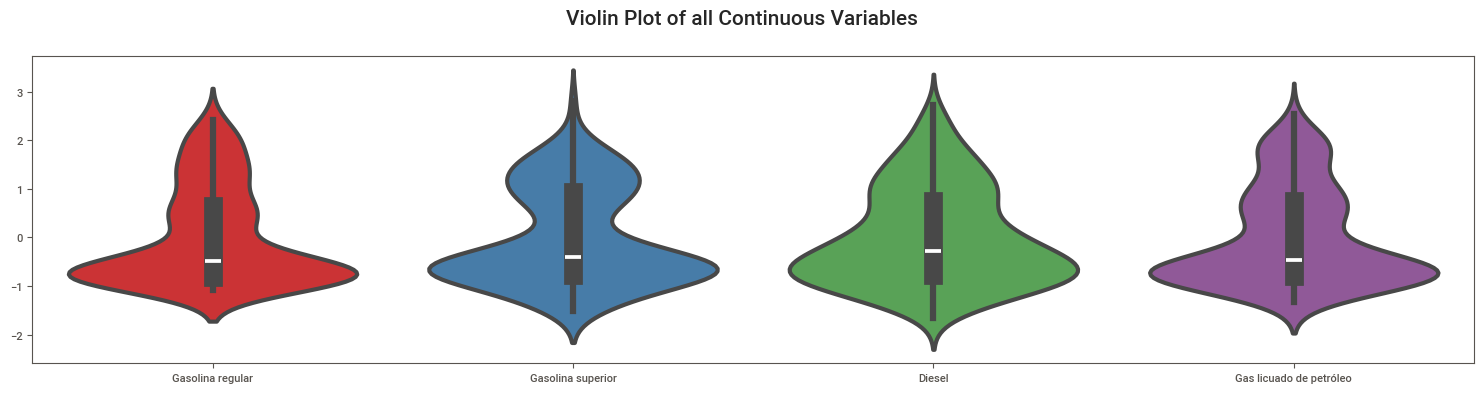

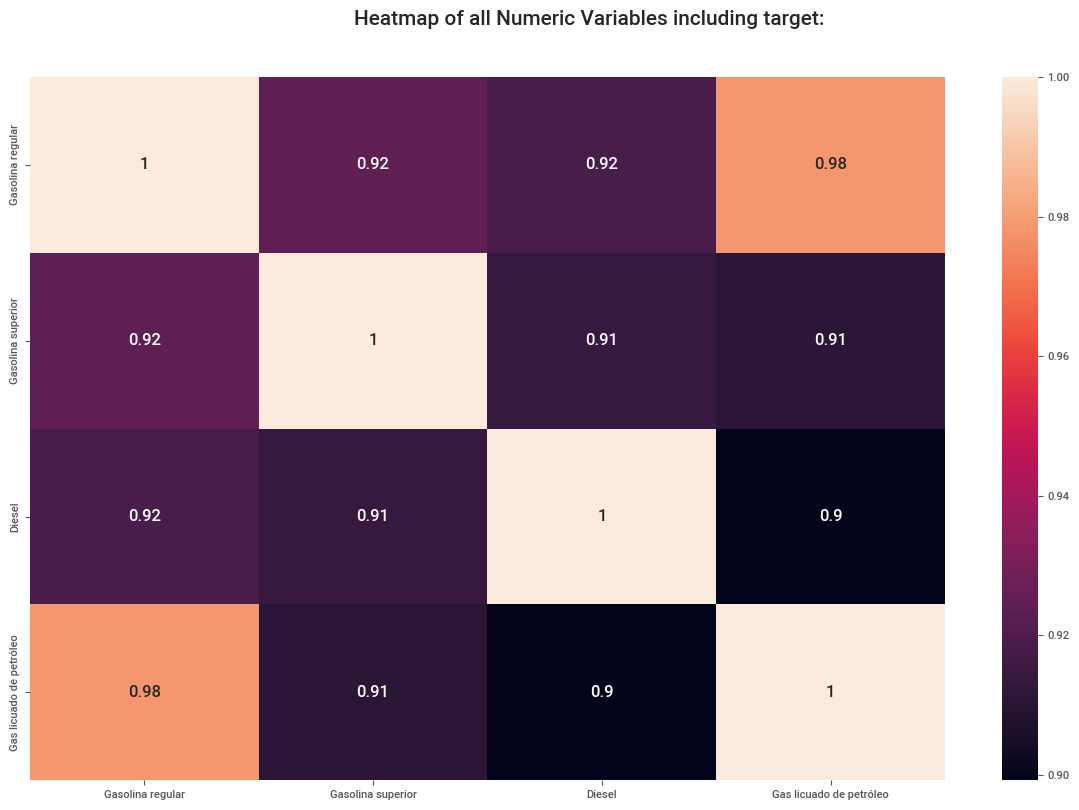

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.200000,308156.820000,6.346671e+05,194410.476190
1,2000-02-01,205530.960000,307766.310000,6.423807e+05,174710.552381
2,2000-03-01,229499.560000,331910.290000,6.998072e+05,189234.066667
3,2000-04-01,210680.400000,315648.080000,5.868040e+05,174330.607143
4,2000-05-01,208164.340000,319667.970000,6.569482e+05,191745.147619
5,2000-06-01,195088.740000,300347.700000,5.709199e+05,196321.933333
6,2000-07-01,204556.770000,308305.930000,5.764360e+05,192344.502381
7,2000-08-01,218388.510000,323011.860000,5.937708e+05,203727.080952
8,2000-09-01,213906.960000,326455.720000,5.901454e+05,194565.097619
9,2000-10-01,213606.650000,323843.630000,6.411134e+05,210261.826190


In [51]:
csvPath = 'Consumo/dataConsumo.csv'
dataConsumo.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

In [50]:
#report = sv.analyze(dataConsumo)
#report.show_html('Consumo/EDAConsumo.html') 

# IMPORTACION-VOLUMEN-2024-05.xlsx  

In [59]:
csvPath = 'Importacion/IMPORTACION-VOLUMEN-2024-05.csv'

dataImportacion = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Importacion/IMPORTACION-VOLUMEN-2024-05.csv
🏁 Combinación de columnas completada.


In [60]:
dataImportacion = dataImportacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataImportacion['Fecha'] = pd.to_datetime(dataImportacion['Fecha'])
dataImportacion.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,566101.99,194065.738095
1,2001-02-01,123115.99,243091.07,489525.8,170703.380952
2,2001-03-01,161726.42,312084.38,575559.68,161837.371429
3,2001-04-01,127338.74,285054.89,437745.42,163048.642857
4,2001-05-01,168730.19,300913.67,552609.13,171518.861905


Shape of your Data Set loaded: (281, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,81015.300000,987872.050000,No issue
Gasolina superior,float64,0.000000,NA,170292.500000,1227173.530000,Column has 2 outliers greater than upper bound (939346.60) or lower than lower bound(23410.12). Cap them or remove them.
Diesel,float64,0.000000,NA,229764.740000,1595698.560000,No issue
Gas licuado de petróleo,float64,0.000000,NA,100561.466667,1077122.750000,Column has 1 outliers greater than upper bound (1076259.26) or lower than lower bound(-285424.28). Cap them or remove them.


Number of All Scatter Plots = 10


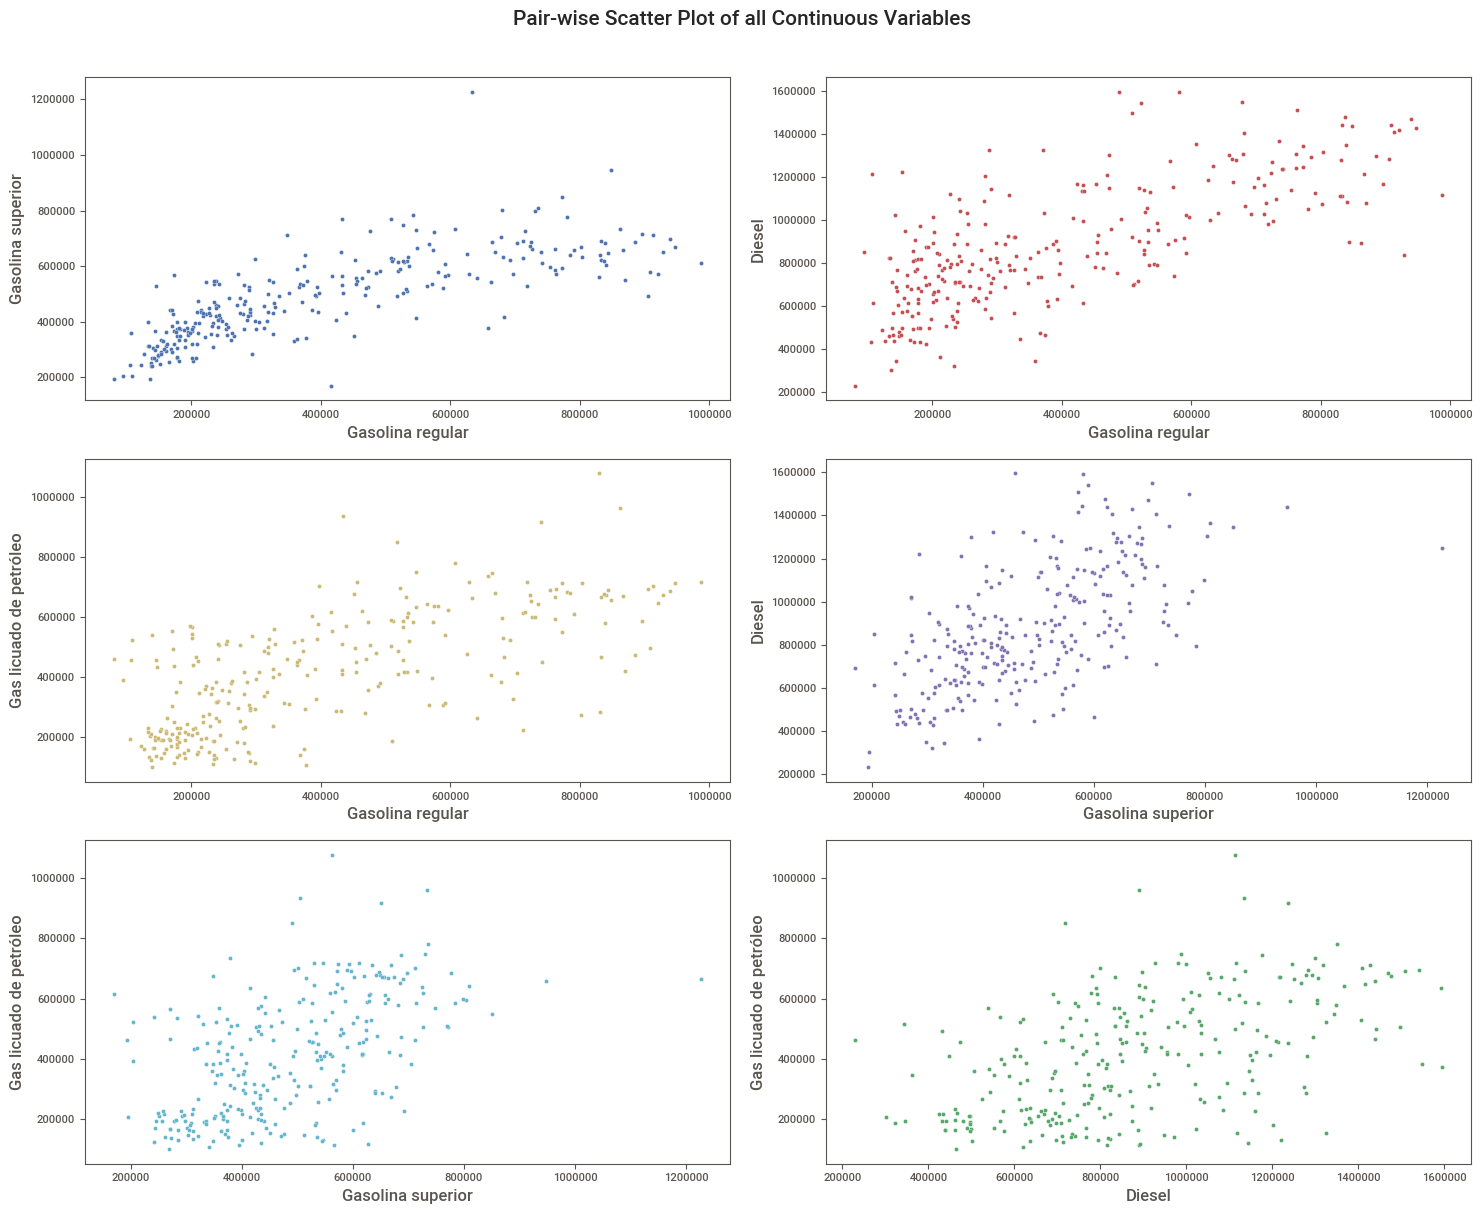

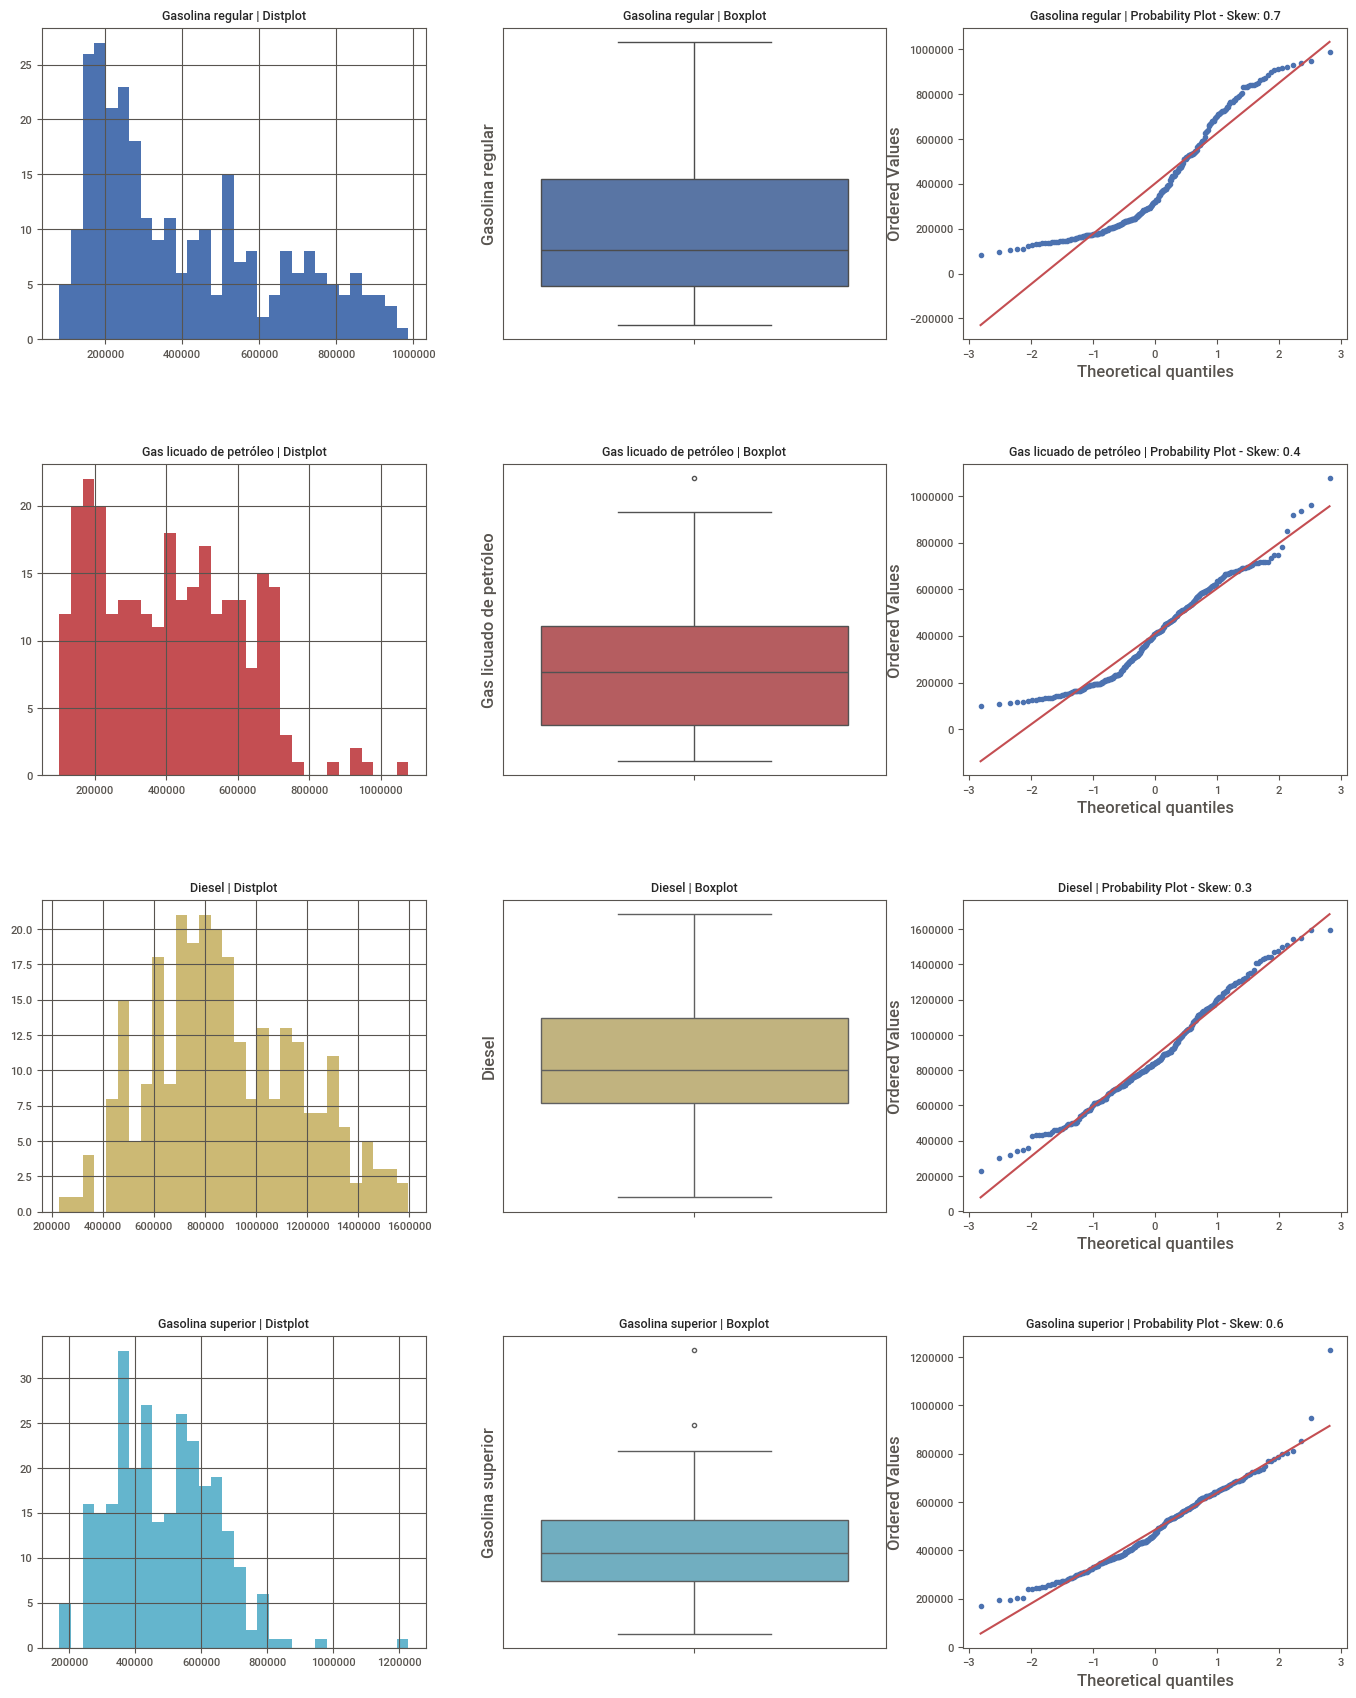

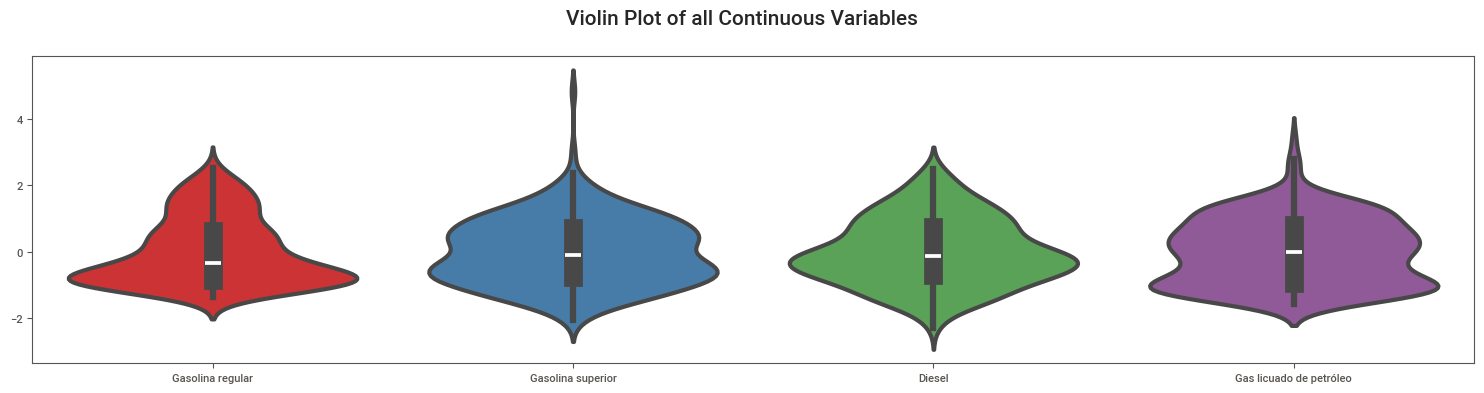

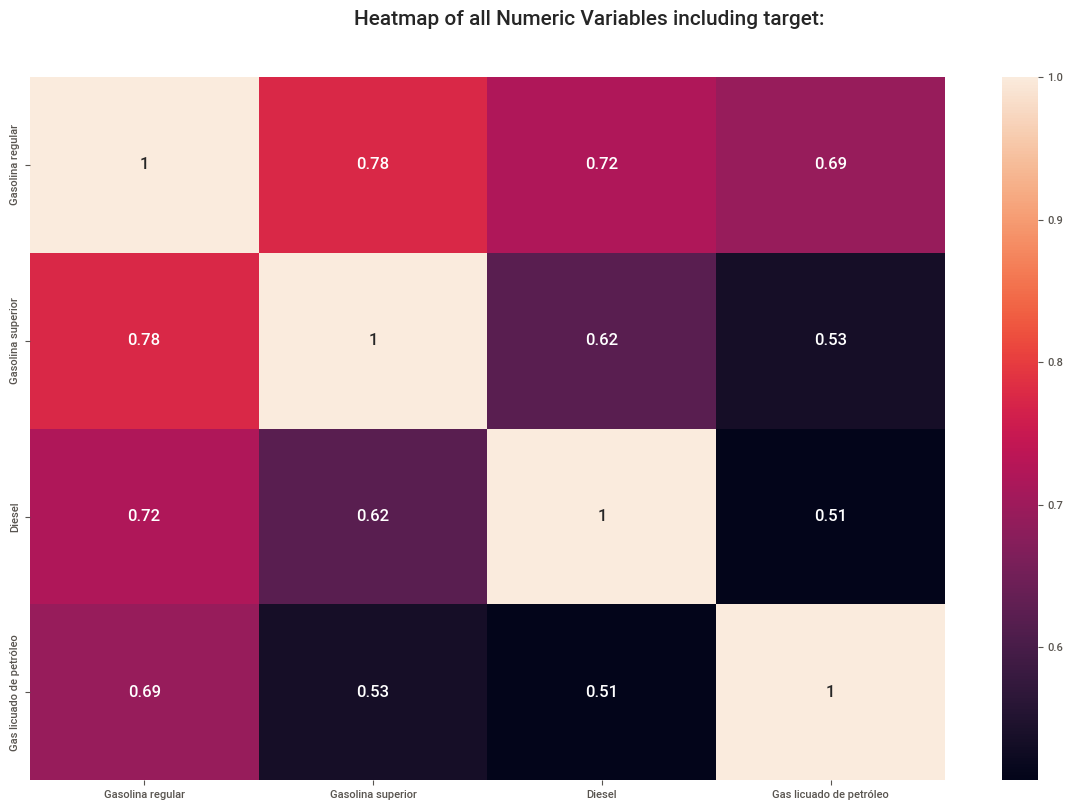

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.500000,373963.960,566101.990,1.940657e+05
1,2001-02-01,123115.990000,243091.070,489525.800,1.707034e+05
2,2001-03-01,161726.420000,312084.380,575559.680,1.618374e+05
3,2001-04-01,127338.740000,285054.890,437745.420,1.630486e+05
4,2001-05-01,168730.190000,300913.670,552609.130,1.715189e+05
5,2001-06-01,152899.090000,333217.190,497855.260,1.900044e+05
6,2001-07-01,136299.130000,195071.860,302350.020,2.060228e+05
7,2001-08-01,139365.070000,268153.260,464159.130,1.005615e+05
8,2001-09-01,233643.750000,308439.070,321952.940,1.868390e+05
9,2001-10-01,141550.220000,305102.280,438989.550,1.638642e+05


In [65]:
csvPath = 'Importacion/dataImportacion.csv'
dataImportacion.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

# Precios-Promedio-Nacionales-Diarios-2024-3.xlsx

In [62]:
csvPath = 'PreciosPromedioNacionales/PreciosPromedioNacionales.csv'

dataPrecios = pd.read_csv(csvPath)
print(f"✅ Archivo cargado: {csvPath}")

✅ Archivo cargado: PreciosPromedioNacionales/PreciosPromedioNacionales.csv


In [64]:
dataPrecios = dataPrecios[['FECHA', 'Regular GTQ/GALON', 'Superior GTQ/GALON', 'Diesel GTQ/GALON', 'Glp Cilindro 25Lbs. GTQ/LB']]
dataPrecios['FECHA'] = pd.to_datetime(dataPrecios['FECHA'])
dataPrecios.head()

,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96


Shape of your Data Set loaded: (1305, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['FECHA']
To fix these data quality issues in the dataset, import FixD

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
FECHA,object,0.000000,100,,,Possible ID column: drop before modeling step.
Regular GTQ/GALON,float64,0.000000,NA,21.110000,40.500000,No issue
Superior GTQ/GALON,float64,0.000000,NA,21.910000,43.240000,Column has a high correlation with ['Regular GTQ/GALON']. Consider dropping one of them.
Diesel GTQ/GALON,float64,0.000000,NA,17.610000,41.270000,"Column has a high correlation with ['Regular GTQ/GALON', 'Superior GTQ/GALON']. Consider dropping one of them."
Glp Cilindro 25Lbs. GTQ/LB,float64,0.000000,NA,3.960000,5.880000,No issue


Number of All Scatter Plots = 10


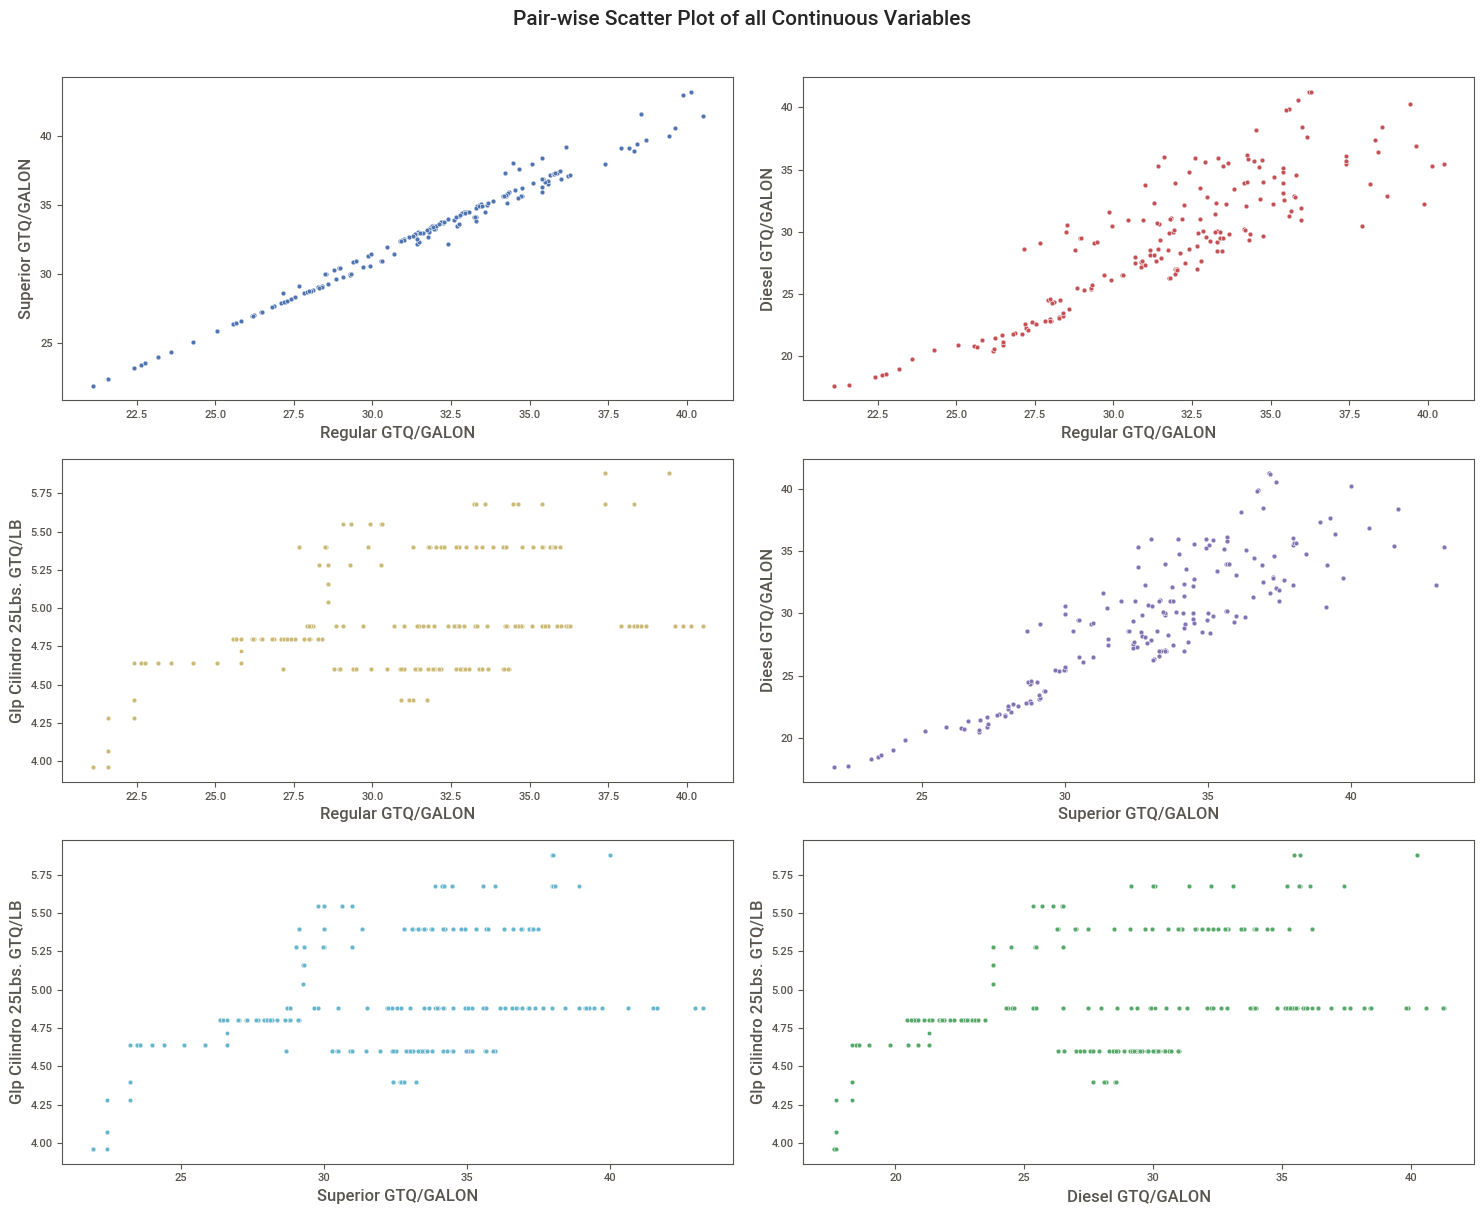

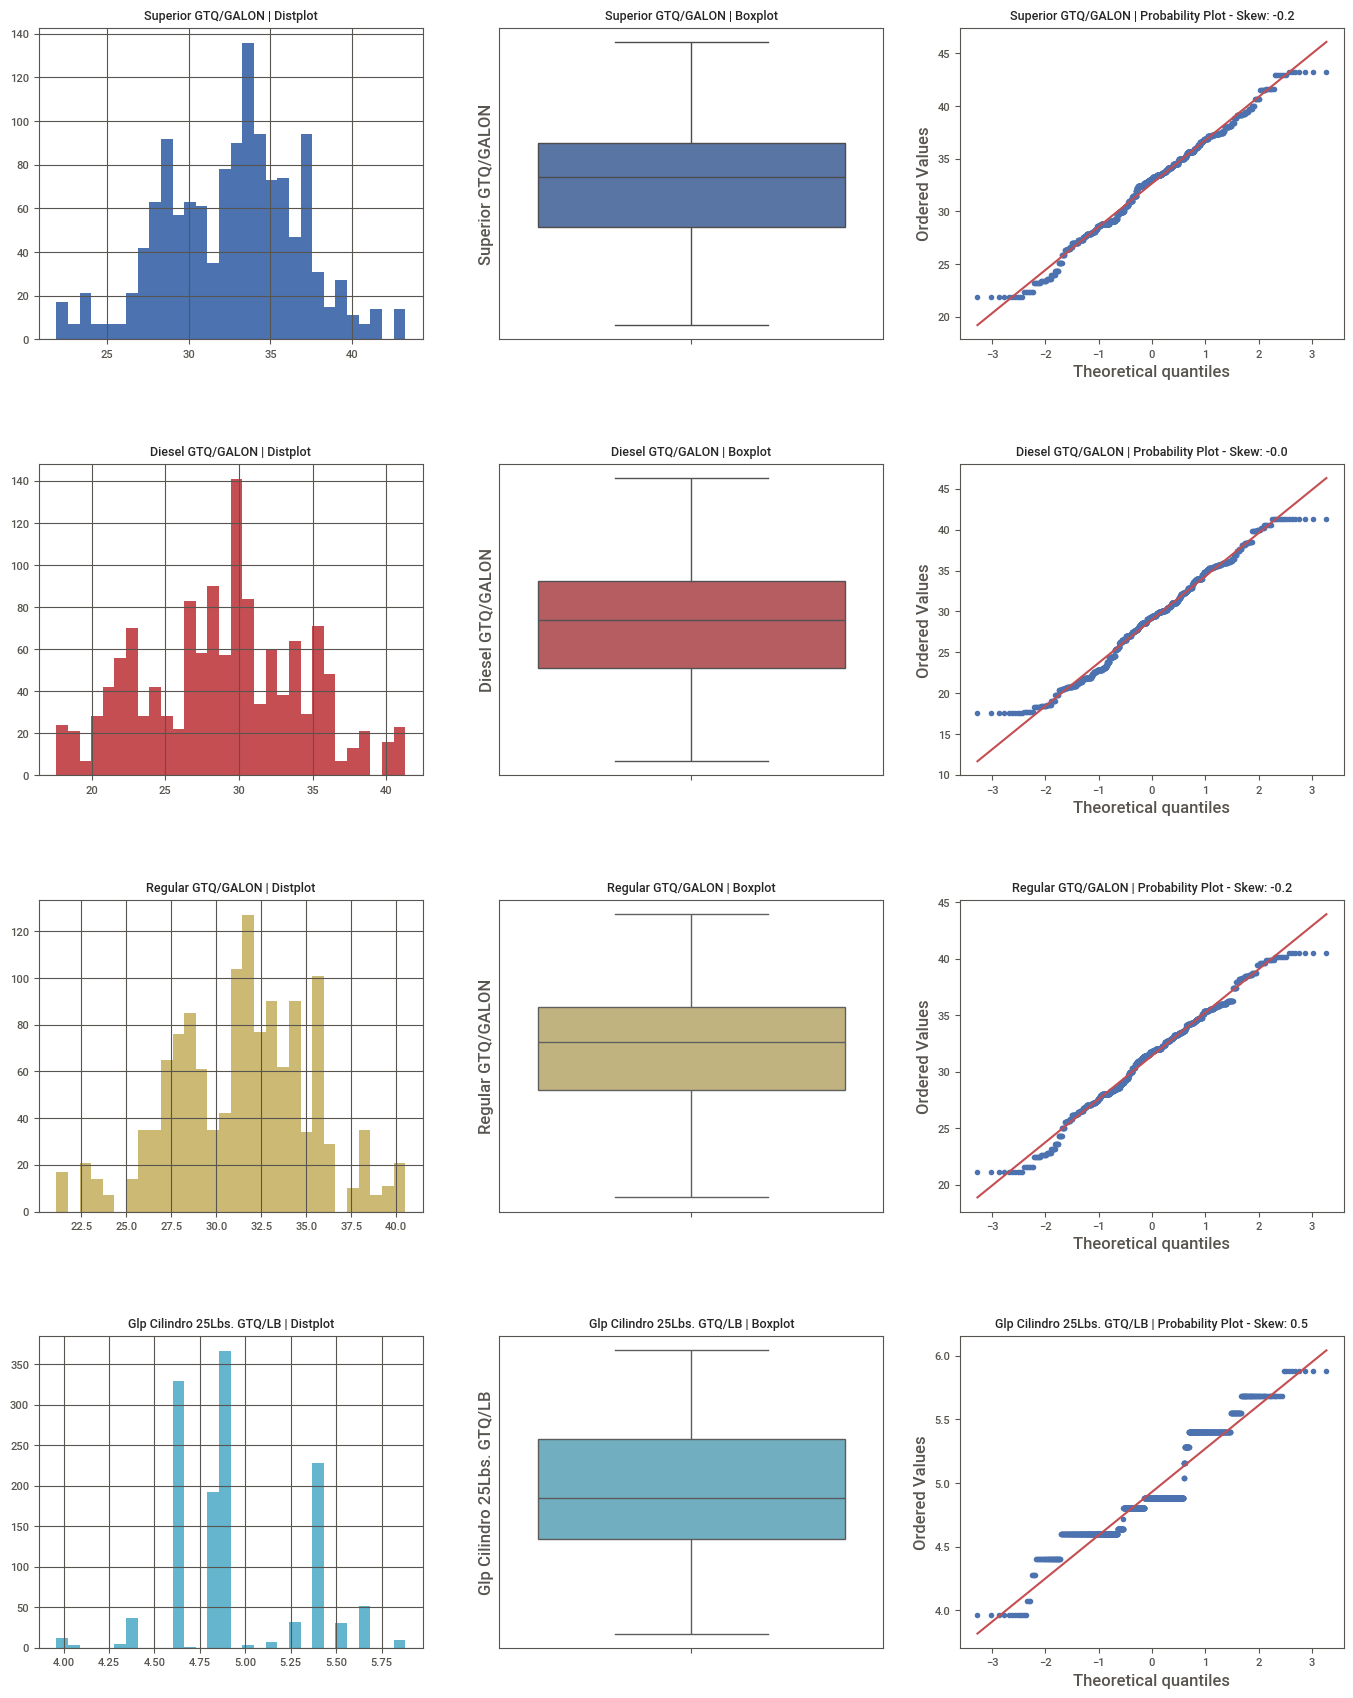

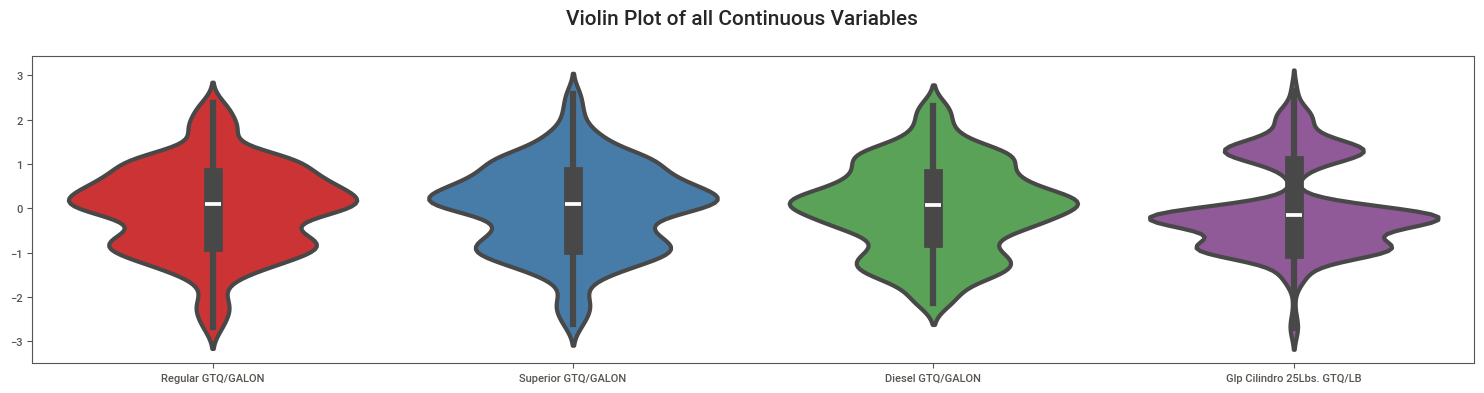

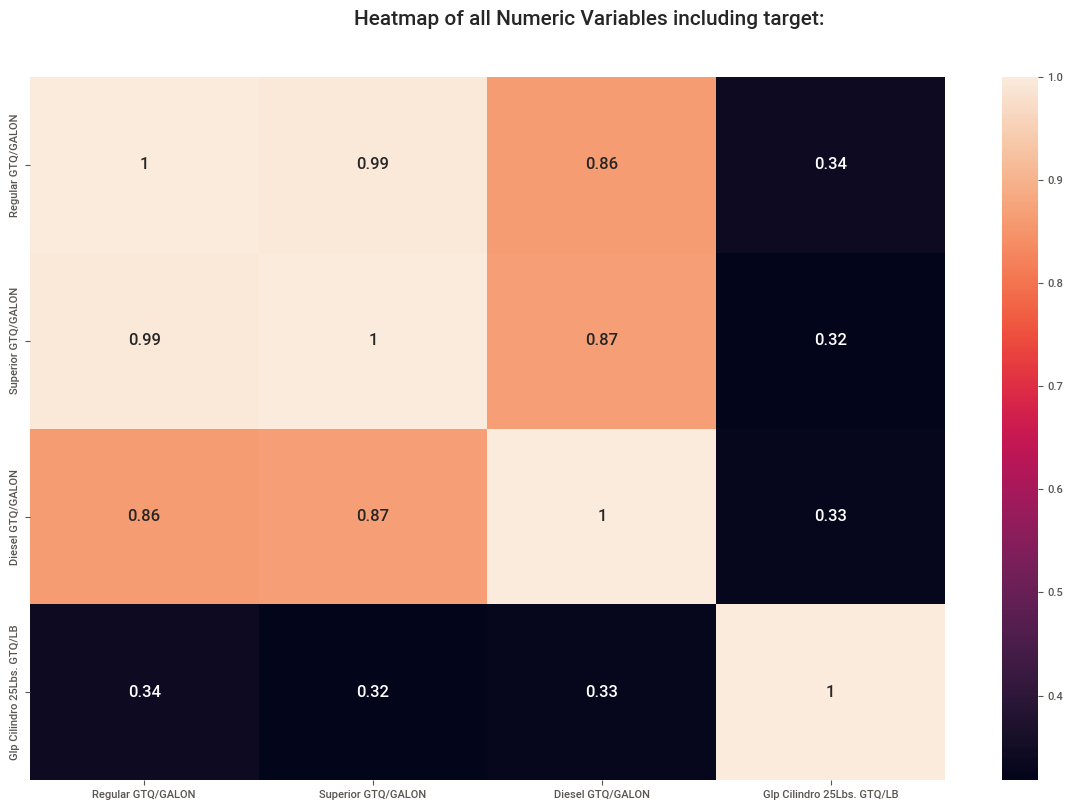

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96
...,...,...,...,...,...
1300,2024-07-24,31.29,32.79,28.09,4.40
1301,2024-07-25,31.29,32.79,28.09,4.40
1302,2024-07-26,31.29,32.79,28.09,4.40
1303,2024-07-27,31.29,32.79,28.09,4.40


In [66]:
csvPath = 'PreciosPromedioNacionales/dataPrecios.csv'
dataPrecios.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)